GSPC DataAnalyze

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
## load data set
df_raw = pd.read_csv('GSPC.csv')


In [3]:
df_raw.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [4]:
## shoose feature
df_adjclose = df_raw[['Date', 'Adj Close']]


In [5]:
df_adjclose.head()


,Date,Adj Close
0,1927-12-30,17.660000
1,1928-01-03,17.760000
2,1928-01-04,17.719999
3,1928-01-05,17.549999
4,1928-01-06,17.660000


In [6]:
df_adjclose.describe()


,Adj Close
count,23300.000000
mean,484.025642
std,720.770007
min,4.400000
25%,23.840000
50%,99.459999
75%,829.322509
max,3580.840088


In [7]:
df_adjclose.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23300 entries, 0 to 23299
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23300 non-null  object 
 1   Adj Close  23300 non-null  float64
dtypes: float64(1), object(1)
memory usage: 364.2+ KB


In [8]:
## change col type
df_adjclose['Date'] = pd.to_datetime(df_adjclose['Date'],format="%Y-%m-%d")


<ipython-input-8-9e90cc210a4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose['Date'] = pd.to_datetime(df_adjclose['Date'],format="%Y-%m-%d")


In [9]:
## set index
df_adjclose.set_index('Date', inplace=True)


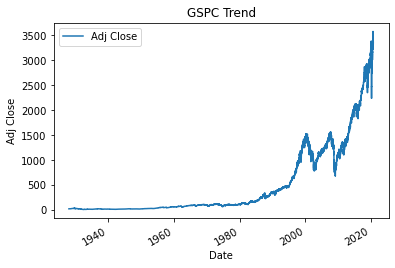

In [10]:
## plot the trend
df_adjclose.plot()
plt.title('GSPC Trend')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

In [11]:
## shift the line
df_adjclose['Adj Close'].shift(1)

Date
1927-12-30            NaN
1928-01-03      17.660000
1928-01-04      17.760000
1928-01-05      17.719999
1928-01-06      17.549999
                 ...     
2020-09-28    3298.459961
2020-09-29    3351.600098
2020-09-30    3335.469971
2020-10-01    3363.000000
2020-10-02    3380.800049
Name: Adj Close, Length: 23300, dtype: float64

In [12]:
df_adjclose['Adj Close']

Date
1927-12-30      17.660000
1928-01-03      17.760000
1928-01-04      17.719999
1928-01-05      17.549999
1928-01-06      17.660000
                 ...     
2020-09-28    3351.600098
2020-09-29    3335.469971
2020-09-30    3363.000000
2020-10-01    3380.800049
2020-10-02    3348.419922
Name: Adj Close, Length: 23300, dtype: float64

In [13]:
## calculate Return col
df_adjclose['Return'] = (df_adjclose['Adj Close'].shift(1).fillna(0) / df_adjclose['Adj Close']) - 1

<ipython-input-13-79d35581d873>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose['Return'] = (df_adjclose['Adj Close'].shift(1).fillna(0) / df_adjclose['Adj Close']) - 1


In [14]:
## fill in the first NaN
df_adjclose.iloc[0, 1] = 0

/opt/anaconda/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-14-cd2ad46a8659>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose.iloc[0, 1] = 0


In [15]:
df_adjclose

,Adj Close,Return
Date,,
1927-12-30,17.660000,0.000000
1928-01-03,17.760000,-0.005631
1928-01-04,17.719999,0.002257
1928-01-05,17.549999,0.009687
1928-01-06,17.660000,-0.006229
...,...,...
2020-09-28,3351.600098,-0.015855
2020-09-29,3335.469971,0.004836
2020-09-30,3363.000000,-0.008186


In [16]:
## plot it
df_return = df_adjclose['Return']

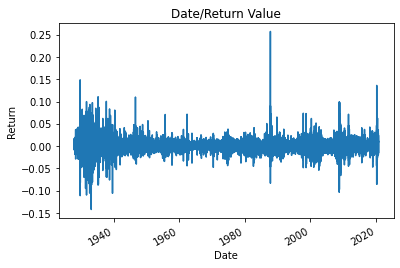

In [17]:
df_return.plot()
plt.title('Date/Return Value')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

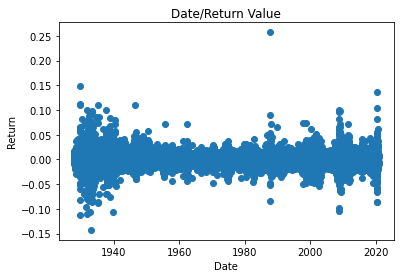

In [18]:
plt.scatter(x = df_adjclose.index, y = df_adjclose['Return'])
plt.title('Date/Return Value')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()

In [19]:
return_avg = df_return.mean()

In [20]:
df_return.describe()

count    23300.000000
mean        -0.000153
std          0.012063
min         -0.142438
25%         -0.005382
50%         -0.000482
75%          0.004552
max          0.257339
Name: Return, dtype: float64

In [21]:
return_avg

-0.00015270652230698156

In [22]:
return_std = df_return.std()

In [23]:
return_std

0.012062780976325764

In [24]:
## calculate the scaled return col (Z-score)
df_adjclose['ScaledReturn'] = (df_adjclose['Return'] - return_avg) / return_std

<ipython-input-24-05754efc0b8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adjclose['ScaledReturn'] = (df_adjclose['Return'] - return_avg) / return_std


In [25]:
df_adjclose

,Adj Close,Return,ScaledReturn
Date,,,
1927-12-30,17.660000,0.000000,0.012659
1928-01-03,17.760000,-0.005631,-0.454118
1928-01-04,17.719999,0.002257,0.199796
1928-01-05,17.549999,0.009687,0.815676
1928-01-06,17.660000,-0.006229,-0.503708
...,...,...,...
2020-09-28,3351.600098,-0.015855,-1.301727
2020-09-29,3335.469971,0.004836,0.413557
2020-09-30,3363.000000,-0.008186,-0.665970


In [26]:
## plot the ScaledReturn
df_ScaledReturn = df_adjclose['ScaledReturn']

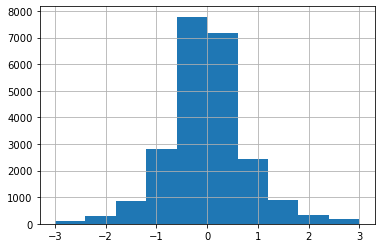

In [27]:
df_ScaledReturn.hist(range=(-3, 3))
plt.show()

In [28]:
min_val = df_ScaledReturn.min()
max_val = df_ScaledReturn.max()
bucket_width = (max_val - min_val) / 200
count = len(df_adjclose)

In [29]:
min_val

-11.79536340199976

In [30]:
max_val

21.34593462540978

In [31]:
bucket_width

0.1657064901370477

In [32]:
bin_list = [ min_val + bucket_width * i for i in range(0, 200) ]

In [33]:
bin_list[:5]

[-11.79536340199976,
 -11.629656911862712,
 -11.463950421725665,
 -11.298243931588617,
 -11.13253744145157]

In [34]:
mid_point_list = [ i - 0.5 * bucket_width for i in bin_list ]

In [35]:
mid_point_list[:5]

[-11.878216647068284,
 -11.712510156931236,
 -11.546803666794188,
 -11.381097176657141,
 -11.215390686520093]

In [36]:
def frequency(data, bins):
    # work with local sorted copy of bins for performance
    bins = bins[:]
    bins.sort()
    freqs = [0] * (len(bins)+1)
    for item in data:
        for i, bin_val in enumerate(bins):
            if item <= bin_val:
                freqs[i] += 1
                break
        else:
            freqs[len(bins)] += 1
    return freqs

In [37]:
frequency_list = frequency(df_adjclose['ScaledReturn'], bin_list)

In [38]:
del frequency_list[-1]

In [39]:
len(frequency_list)

200

In [40]:
empirical_PDF_list = [ i / count / bucket_width for i in frequency_list ]

In [41]:
empirical_PDF_list[:5]

[0.0002590028604198096, 0.0, 0.0, 0.0, 0.0]

In [42]:
normal_PDF_list = [ 1 / math.sqrt(2 * math.pi) * math.exp(-0.5 * i * i) for i in mid_point_list ]

In [43]:
normal_PDF_list[:5]

[9.186812991059621e-32,
 6.4866891975736745e-31,
 4.45611271258505e-30,
 2.978270286921542e-29,
 1.9366311539329182e-28]

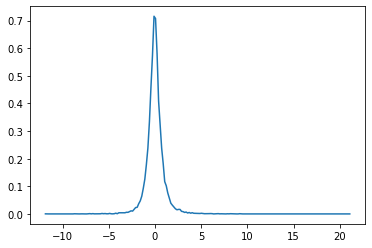

In [44]:
plt.plot(mid_point_list, empirical_PDF_list)
plt.show()

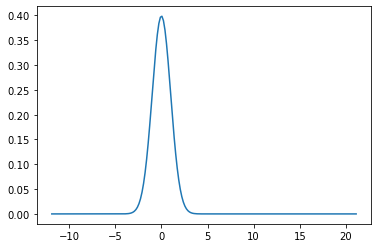

In [45]:
plt.plot(mid_point_list, normal_PDF_list)

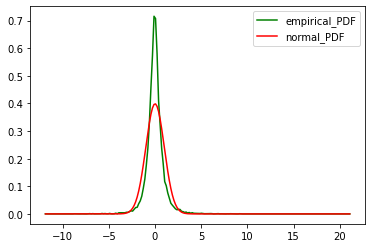

In [46]:
plt.plot(mid_point_list, empirical_PDF_list, color='green', label='empirical_PDF')
plt.plot(mid_point_list, normal_PDF_list, color='red', label='normal_PDF')
plt.legend()
plt.show()